## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Шавандрин |
|---------|--------|
| Группа  | 8      |

**Вариант:** 2. Tensorflow/Keras

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

def plot(model, h, test):
    pred = model.predict(test.batch(128))
    labels = np.concatenate([y for x, y in test.batch(1000)], axis=0)
    conf_matrix = tf.math.confusion_matrix(labels, pred.argmax(axis=1))
    
    figure = plt.figure(figsize=(15, 4))
    axes = figure.add_subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    matr = axes.imshow(conf_matrix)
    figure.colorbar(matr)
    axes.set_title('Матрица неточности')
    axes = figure.add_subplot(1, 3, 2)
    plt.xticks(range(1, len(h.history['loss'])+1))
    plt.plot(h.history['accuracy'], 'r.-', label='accuracy')
    plt.plot(h.history['val_accuracy'], 'g--', label='val_accuracy')
    plt.legend()
    axes.set_title('Точность на обучающей и тестовой выборке')
    axes = figure.add_subplot(1, 3, 3)
    plt.xticks(range(1, len(h.history['loss'])+1))
    plt.plot(h.history['loss'], 'r.-', label='loss')
    plt.plot(h.history['val_loss'], 'g--', label='val_loss')
    plt.legend()
    axes.set_title('Loss на обучающей и тестовой выборке')
    plt.show()

## MNIST

In [3]:
(mnist_train, mnist_test), mnist_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [4]:
mnist_train = mnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train = mnist_train.cache()
mnist_train = mnist_train.shuffle(mnist_info.splits['train'].num_examples)

mnist_test = mnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

### Однослойный персептрон

#### Оптимизатор SGD

Epoch 1/10
938/938 - 8s - loss: 0.9770 - accuracy: 0.7846 - val_loss: 0.6037 - val_accuracy: 0.8638 - 8s/epoch - 9ms/step
Epoch 2/10
938/938 - 3s - loss: 0.5540 - accuracy: 0.8648 - val_loss: 0.4795 - val_accuracy: 0.8787 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.4742 - accuracy: 0.8786 - val_loss: 0.4284 - val_accuracy: 0.8890 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.4351 - accuracy: 0.8852 - val_loss: 0.3996 - val_accuracy: 0.8933 - 3s/epoch - 4ms/step
Epoch 5/10
938/938 - 3s - loss: 0.4107 - accuracy: 0.8905 - val_loss: 0.3812 - val_accuracy: 0.8980 - 3s/epoch - 4ms/step
Epoch 6/10
938/938 - 3s - loss: 0.3936 - accuracy: 0.8938 - val_loss: 0.3669 - val_accuracy: 0.9025 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.3808 - accuracy: 0.8963 - val_loss: 0.3561 - val_accuracy: 0.9044 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.3707 - accuracy: 0.8986 - val_loss: 0.3480 - val_accuracy: 0.9053 - 3s/epoch - 4ms/step
Epoch 9/10
938/938 - 3s 

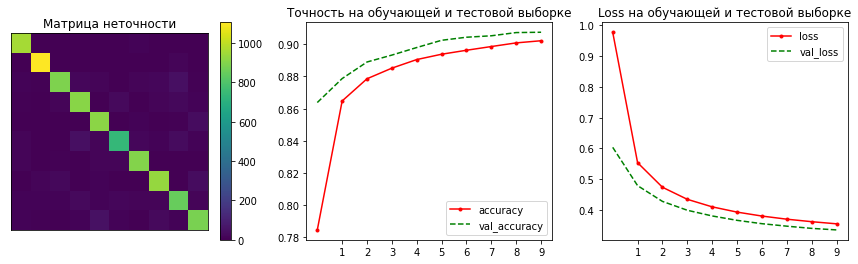

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile('sgd', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(64), epochs = 10, validation_data = mnist_test.batch(64), verbose = 2)
plot(model, h, mnist_test)

#### Оптимизатор Adam

Epoch 1/10
938/938 - 4s - loss: 0.5553 - accuracy: 0.8575 - val_loss: 0.3335 - val_accuracy: 0.9101 - 4s/epoch - 4ms/step
Epoch 2/10
938/938 - 3s - loss: 0.3246 - accuracy: 0.9104 - val_loss: 0.2945 - val_accuracy: 0.9197 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.2964 - accuracy: 0.9173 - val_loss: 0.2794 - val_accuracy: 0.9227 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.2828 - accuracy: 0.9210 - val_loss: 0.2754 - val_accuracy: 0.9247 - 3s/epoch - 3ms/step
Epoch 5/10
938/938 - 3s - loss: 0.2742 - accuracy: 0.9242 - val_loss: 0.2734 - val_accuracy: 0.9230 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.2686 - accuracy: 0.9246 - val_loss: 0.2681 - val_accuracy: 0.9263 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.2641 - accuracy: 0.9261 - val_loss: 0.2654 - val_accuracy: 0.9275 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.2605 - accuracy: 0.9273 - val_loss: 0.2657 - val_accuracy: 0.9261 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 3s 

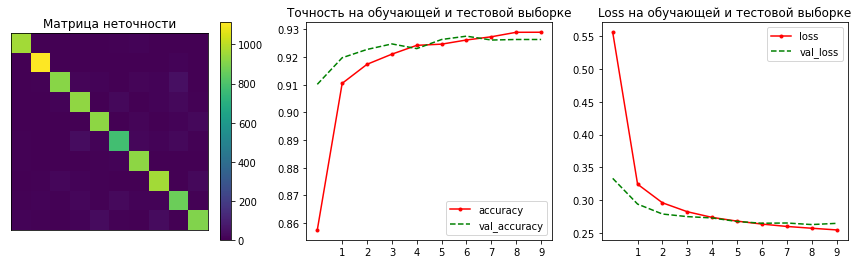

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.001), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(64), epochs = 10, validation_data = mnist_test.batch(64), verbose = 2)
plot(model, h, mnist_test)

Как видно из графиков, наша 1-слойная модель с оптимизатором Adam имеет более высокую точность (около 93%).

### Многослойный персептрон

#### Двухслойный персептрон с оптимизатором SGD

Epoch 1/10
469/469 - 4s - loss: 0.3129 - accuracy: 0.9079 - val_loss: 0.1747 - val_accuracy: 0.9475 - 4s/epoch - 8ms/step
Epoch 2/10
469/469 - 3s - loss: 0.1341 - accuracy: 0.9613 - val_loss: 0.1177 - val_accuracy: 0.9644 - 3s/epoch - 7ms/step
Epoch 3/10
469/469 - 3s - loss: 0.0956 - accuracy: 0.9715 - val_loss: 0.0989 - val_accuracy: 0.9685 - 3s/epoch - 7ms/step
Epoch 4/10
469/469 - 3s - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.0928 - val_accuracy: 0.9712 - 3s/epoch - 7ms/step
Epoch 5/10
469/469 - 3s - loss: 0.0618 - accuracy: 0.9818 - val_loss: 0.0883 - val_accuracy: 0.9732 - 3s/epoch - 7ms/step
Epoch 6/10
469/469 - 3s - loss: 0.0516 - accuracy: 0.9850 - val_loss: 0.0781 - val_accuracy: 0.9760 - 3s/epoch - 6ms/step
Epoch 7/10
469/469 - 3s - loss: 0.0434 - accuracy: 0.9872 - val_loss: 0.0792 - val_accuracy: 0.9767 - 3s/epoch - 7ms/step
Epoch 8/10
469/469 - 3s - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0690 - val_accuracy: 0.9791 - 3s/epoch - 7ms/step
Epoch 9/10
469/469 - 3s 

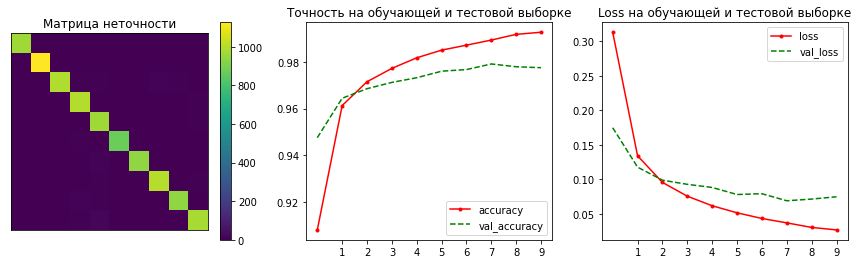

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.SGD(0.05, 0.9), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

#### Двухслойный персептрон с оптимизатором, использующим алгоритм RMSprop.

Epoch 1/10
469/469 - 4s - loss: 0.5426 - accuracy: 0.8675 - val_loss: 0.2800 - val_accuracy: 0.9206 - 4s/epoch - 9ms/step
Epoch 2/10
469/469 - 4s - loss: 0.2534 - accuracy: 0.9277 - val_loss: 0.2177 - val_accuracy: 0.9359 - 4s/epoch - 8ms/step
Epoch 3/10
469/469 - 4s - loss: 0.2023 - accuracy: 0.9411 - val_loss: 0.1844 - val_accuracy: 0.9444 - 4s/epoch - 9ms/step
Epoch 4/10
469/469 - 3s - loss: 0.1697 - accuracy: 0.9513 - val_loss: 0.1601 - val_accuracy: 0.9537 - 3s/epoch - 7ms/step
Epoch 5/10
469/469 - 4s - loss: 0.1459 - accuracy: 0.9578 - val_loss: 0.1398 - val_accuracy: 0.9593 - 4s/epoch - 9ms/step
Epoch 6/10
469/469 - 5s - loss: 0.1276 - accuracy: 0.9627 - val_loss: 0.1273 - val_accuracy: 0.9627 - 5s/epoch - 10ms/step
Epoch 7/10
469/469 - 4s - loss: 0.1130 - accuracy: 0.9672 - val_loss: 0.1180 - val_accuracy: 0.9643 - 4s/epoch - 8ms/step
Epoch 8/10
469/469 - 3s - loss: 0.1009 - accuracy: 0.9710 - val_loss: 0.1080 - val_accuracy: 0.9682 - 3s/epoch - 7ms/step
Epoch 9/10
469/469 - 4s

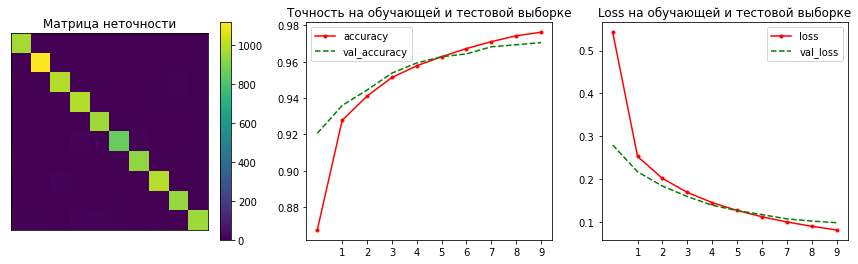

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('rmsprop', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

#### Двухслойный персептрон с оптимизатором Adam

Epoch 1/10
469/469 - 4s - loss: 0.4791 - accuracy: 0.8739 - val_loss: 0.2584 - val_accuracy: 0.9255 - 4s/epoch - 9ms/step
Epoch 2/10
469/469 - 3s - loss: 0.2274 - accuracy: 0.9371 - val_loss: 0.1912 - val_accuracy: 0.9449 - 3s/epoch - 7ms/step
Epoch 3/10
469/469 - 3s - loss: 0.1736 - accuracy: 0.9514 - val_loss: 0.1555 - val_accuracy: 0.9553 - 3s/epoch - 7ms/step
Epoch 4/10
469/469 - 4s - loss: 0.1407 - accuracy: 0.9604 - val_loss: 0.1330 - val_accuracy: 0.9619 - 4s/epoch - 8ms/step
Epoch 5/10
469/469 - 4s - loss: 0.1171 - accuracy: 0.9676 - val_loss: 0.1213 - val_accuracy: 0.9647 - 4s/epoch - 9ms/step
Epoch 6/10
469/469 - 4s - loss: 0.1004 - accuracy: 0.9719 - val_loss: 0.1092 - val_accuracy: 0.9677 - 4s/epoch - 7ms/step
Epoch 7/10
469/469 - 3s - loss: 0.0870 - accuracy: 0.9760 - val_loss: 0.0992 - val_accuracy: 0.9707 - 3s/epoch - 7ms/step
Epoch 8/10
469/469 - 4s - loss: 0.0756 - accuracy: 0.9794 - val_loss: 0.0945 - val_accuracy: 0.9728 - 4s/epoch - 8ms/step
Epoch 9/10
469/469 - 4s 

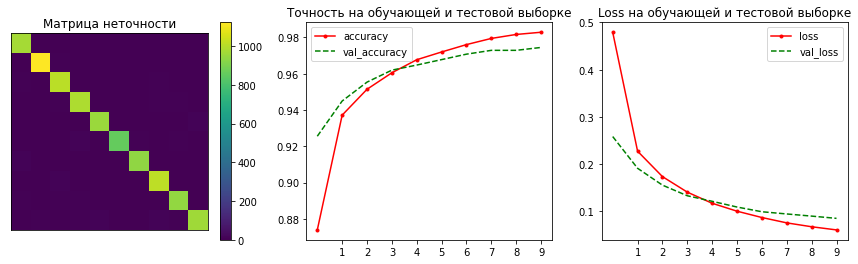

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Как видно из графиков, наша 2-слойная модель с оптимизатором SGD имеет более высокую точность (около 98%).

Для сравнения, увеличим количество нейронов, чтобы проверить, насколько меняется точность.

Epoch 1/10
469/469 - 7s - loss: 0.5543 - accuracy: 0.8565 - val_loss: 0.2524 - val_accuracy: 0.9257 - 7s/epoch - 15ms/step
Epoch 2/10
469/469 - 6s - loss: 0.2283 - accuracy: 0.9327 - val_loss: 0.2038 - val_accuracy: 0.9369 - 6s/epoch - 12ms/step
Epoch 3/10
469/469 - 6s - loss: 0.1718 - accuracy: 0.9483 - val_loss: 0.1559 - val_accuracy: 0.9516 - 6s/epoch - 12ms/step
Epoch 4/10
469/469 - 6s - loss: 0.1347 - accuracy: 0.9596 - val_loss: 0.1258 - val_accuracy: 0.9633 - 6s/epoch - 12ms/step
Epoch 5/10
469/469 - 7s - loss: 0.1088 - accuracy: 0.9667 - val_loss: 0.1093 - val_accuracy: 0.9662 - 7s/epoch - 14ms/step
Epoch 6/10
469/469 - 6s - loss: 0.0901 - accuracy: 0.9735 - val_loss: 0.0937 - val_accuracy: 0.9716 - 6s/epoch - 13ms/step
Epoch 7/10
469/469 - 6s - loss: 0.0759 - accuracy: 0.9772 - val_loss: 0.0802 - val_accuracy: 0.9752 - 6s/epoch - 12ms/step
Epoch 8/10
469/469 - 7s - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.0796 - val_accuracy: 0.9761 - 7s/epoch - 14ms/step
Epoch 9/10
469/4

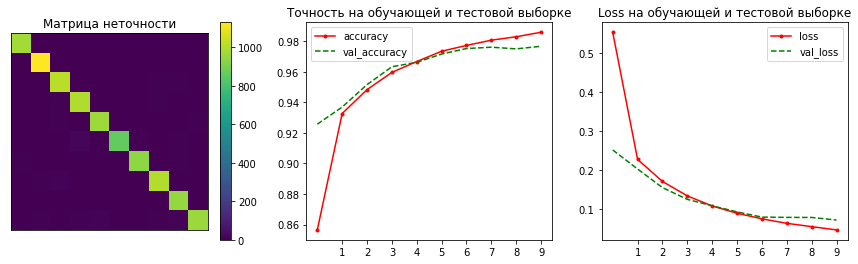

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('rmsprop', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Epoch 1/10
469/469 - 6s - loss: 0.3467 - accuracy: 0.9028 - val_loss: 0.1792 - val_accuracy: 0.9476 - 6s/epoch - 13ms/step
Epoch 2/10
469/469 - 6s - loss: 0.1416 - accuracy: 0.9590 - val_loss: 0.1158 - val_accuracy: 0.9644 - 6s/epoch - 12ms/step
Epoch 3/10
469/469 - 5s - loss: 0.0958 - accuracy: 0.9718 - val_loss: 0.0940 - val_accuracy: 0.9704 - 5s/epoch - 11ms/step
Epoch 4/10
469/469 - 6s - loss: 0.0711 - accuracy: 0.9790 - val_loss: 0.0778 - val_accuracy: 0.9766 - 6s/epoch - 12ms/step
Epoch 5/10
469/469 - 7s - loss: 0.0547 - accuracy: 0.9839 - val_loss: 0.0789 - val_accuracy: 0.9744 - 7s/epoch - 14ms/step
Epoch 6/10
469/469 - 6s - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0694 - val_accuracy: 0.9792 - 6s/epoch - 12ms/step
Epoch 7/10
469/469 - 5s - loss: 0.0345 - accuracy: 0.9903 - val_loss: 0.0711 - val_accuracy: 0.9782 - 5s/epoch - 10ms/step
Epoch 8/10
469/469 - 6s - loss: 0.0271 - accuracy: 0.9923 - val_loss: 0.0685 - val_accuracy: 0.9782 - 6s/epoch - 12ms/step
Epoch 9/10
469/4

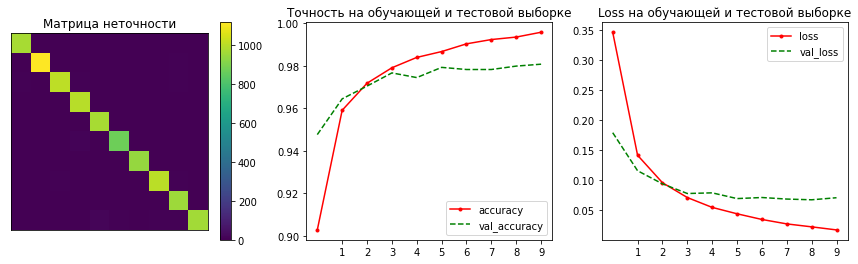

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(mnist_train.batch(128), epochs = 10, validation_data = mnist_test.batch(128), verbose = 2)
plot(model, h, mnist_test)

Как мы можем заметить, увеличение числа нейронов, не сильно увеличило точность. Для двухслойной модели с оптимизатором, использующим алгоритм RMSprop: 0.9767-0.9705 = **0,0062**; с оптимизатором Adam разница в точности составляет 0.9807-0.9744 = **0,0063**.

## FashionMNIST

In [12]:
(fmnist_train, fmnist_test), fmnist_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [13]:
fmnist_train = fmnist_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
fmnist_train = fmnist_train.cache()
fmnist_train = fmnist_train.shuffle(fmnist_info.splits['train'].num_examples)

fmnist_test = fmnist_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

#### 1-слойная модель с оптимизатором SGD

Epoch 1/10
469/469 - 9s - loss: 0.6939 - accuracy: 0.7694 - val_loss: 0.5733 - val_accuracy: 0.8027 - 9s/epoch - 19ms/step
Epoch 2/10
469/469 - 2s - loss: 0.5180 - accuracy: 0.8255 - val_loss: 0.5191 - val_accuracy: 0.8229 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 3s - loss: 0.4834 - accuracy: 0.8369 - val_loss: 0.4987 - val_accuracy: 0.8307 - 3s/epoch - 6ms/step
Epoch 4/10
469/469 - 3s - loss: 0.4654 - accuracy: 0.8428 - val_loss: 0.4934 - val_accuracy: 0.8287 - 3s/epoch - 6ms/step
Epoch 5/10
469/469 - 2s - loss: 0.4536 - accuracy: 0.8450 - val_loss: 0.4881 - val_accuracy: 0.8266 - 2s/epoch - 4ms/step
Epoch 6/10
469/469 - 2s - loss: 0.4442 - accuracy: 0.8493 - val_loss: 0.4783 - val_accuracy: 0.8333 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 0.4377 - accuracy: 0.8504 - val_loss: 0.4740 - val_accuracy: 0.8341 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.4331 - accuracy: 0.8517 - val_loss: 0.4699 - val_accuracy: 0.8318 - 2s/epoch - 4ms/step
Epoch 9/10
469/469 - 2s

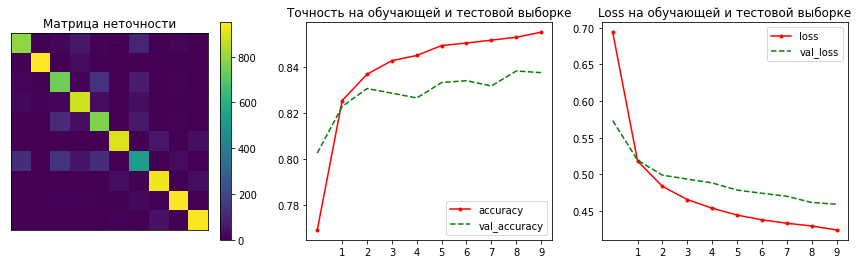

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.SGD(0.01, 0.9), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(128), epochs = 10, validation_data = fmnist_test.batch(128), verbose = 2)
plot(model, h, fmnist_test)

#### 1-слойная модель с оптимизатором Adam

Epoch 1/10
469/469 - 3s - loss: 0.7291 - accuracy: 0.7607 - val_loss: 0.5827 - val_accuracy: 0.8027 - 3s/epoch - 7ms/step
Epoch 2/10
469/469 - 3s - loss: 0.5132 - accuracy: 0.8298 - val_loss: 0.5132 - val_accuracy: 0.8235 - 3s/epoch - 6ms/step
Epoch 3/10
469/469 - 3s - loss: 0.4729 - accuracy: 0.8410 - val_loss: 0.4891 - val_accuracy: 0.8335 - 3s/epoch - 6ms/step
Epoch 4/10
469/469 - 2s - loss: 0.4513 - accuracy: 0.8463 - val_loss: 0.4825 - val_accuracy: 0.8321 - 2s/epoch - 5ms/step
Epoch 5/10
469/469 - 2s - loss: 0.4381 - accuracy: 0.8511 - val_loss: 0.4659 - val_accuracy: 0.8394 - 2s/epoch - 4ms/step
Epoch 6/10
469/469 - 2s - loss: 0.4268 - accuracy: 0.8540 - val_loss: 0.4641 - val_accuracy: 0.8383 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 0.4202 - accuracy: 0.8567 - val_loss: 0.4660 - val_accuracy: 0.8386 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.4138 - accuracy: 0.8587 - val_loss: 0.4542 - val_accuracy: 0.8415 - 2s/epoch - 4ms/step
Epoch 9/10
469/469 - 2s 

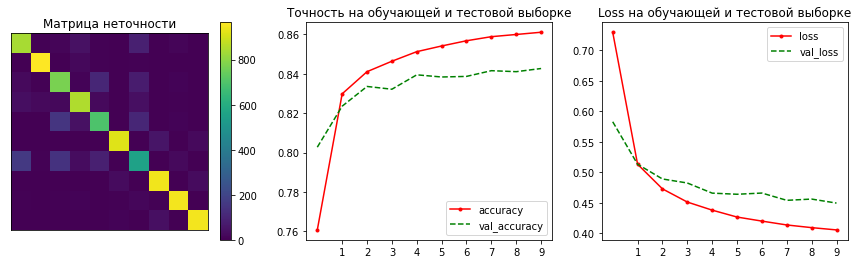

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(128), epochs = 10, validation_data = fmnist_test.batch(128), verbose = 2)
plot(model, h, fmnist_test)

Как видно из графиков, лучшая точность в 84% достигается на 1-слойной модели с оптимизатором Adam.

#### 2-слойная модель с оптимизатором Adam

Epoch 1/10
235/235 - 6s - loss: 0.6126 - accuracy: 0.7961 - val_loss: 0.4813 - val_accuracy: 0.8324 - 6s/epoch - 25ms/step
Epoch 2/10
235/235 - 5s - loss: 0.4263 - accuracy: 0.8532 - val_loss: 0.4373 - val_accuracy: 0.8466 - 5s/epoch - 22ms/step
Epoch 3/10
235/235 - 5s - loss: 0.3827 - accuracy: 0.8663 - val_loss: 0.3990 - val_accuracy: 0.8615 - 5s/epoch - 21ms/step
Epoch 4/10
235/235 - 6s - loss: 0.3586 - accuracy: 0.8726 - val_loss: 0.3791 - val_accuracy: 0.8695 - 6s/epoch - 24ms/step
Epoch 5/10
235/235 - 5s - loss: 0.3357 - accuracy: 0.8812 - val_loss: 0.3784 - val_accuracy: 0.8653 - 5s/epoch - 22ms/step
Epoch 6/10
235/235 - 5s - loss: 0.3213 - accuracy: 0.8851 - val_loss: 0.3816 - val_accuracy: 0.8596 - 5s/epoch - 21ms/step
Epoch 7/10
235/235 - 5s - loss: 0.3055 - accuracy: 0.8908 - val_loss: 0.3788 - val_accuracy: 0.8663 - 5s/epoch - 21ms/step
Epoch 8/10
235/235 - 5s - loss: 0.2956 - accuracy: 0.8937 - val_loss: 0.3532 - val_accuracy: 0.8702 - 5s/epoch - 21ms/step
Epoch 9/10
235/2

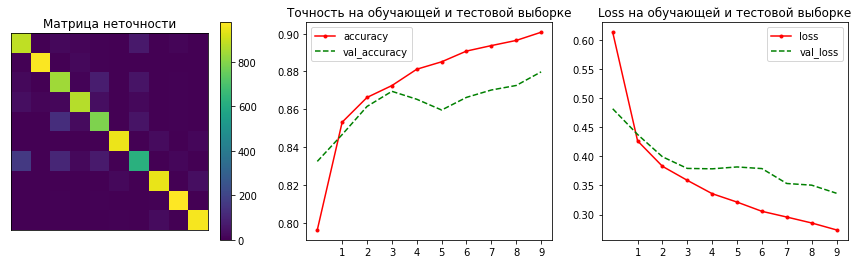

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0005), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(256), epochs = 10, validation_data = fmnist_test.batch(256), verbose = 2)
plot(model, h, fmnist_test)

#### 3-слойная модель с оптимизатором Adam

Epoch 1/10
235/235 - 8s - loss: 0.6924 - accuracy: 0.7746 - val_loss: 0.4985 - val_accuracy: 0.8245 - 8s/epoch - 34ms/step
Epoch 2/10
235/235 - 8s - loss: 0.4342 - accuracy: 0.8496 - val_loss: 0.4439 - val_accuracy: 0.8435 - 8s/epoch - 32ms/step
Epoch 3/10
235/235 - 7s - loss: 0.3852 - accuracy: 0.8651 - val_loss: 0.4098 - val_accuracy: 0.8565 - 7s/epoch - 28ms/step
Epoch 4/10
235/235 - 8s - loss: 0.3592 - accuracy: 0.8745 - val_loss: 0.3858 - val_accuracy: 0.8636 - 8s/epoch - 35ms/step
Epoch 5/10
235/235 - 7s - loss: 0.3404 - accuracy: 0.8794 - val_loss: 0.3773 - val_accuracy: 0.8653 - 7s/epoch - 30ms/step
Epoch 6/10
235/235 - 7s - loss: 0.3213 - accuracy: 0.8870 - val_loss: 0.3601 - val_accuracy: 0.8716 - 7s/epoch - 29ms/step
Epoch 7/10
235/235 - 7s - loss: 0.3090 - accuracy: 0.8897 - val_loss: 0.3643 - val_accuracy: 0.8690 - 7s/epoch - 31ms/step
Epoch 8/10
235/235 - 7s - loss: 0.2944 - accuracy: 0.8949 - val_loss: 0.3612 - val_accuracy: 0.8704 - 7s/epoch - 30ms/step
Epoch 9/10
235/2

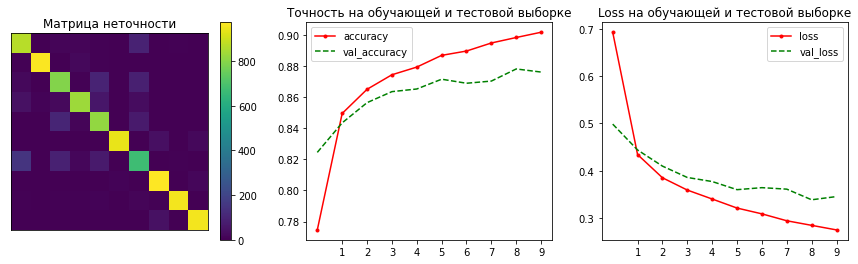

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(tf.keras.optimizers.Adam(0.0002), tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(fmnist_train.batch(256), epochs = 10, validation_data = fmnist_test.batch(256), verbose = 2)
plot(model, h, fmnist_test)

## CIFAR-10

In [18]:
(cifar_train, cifar_test), cifar_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [19]:
cifar_train = cifar_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
cifar_train = cifar_train.cache()
cifar_train = cifar_train.shuffle(cifar_info.splits['train'].num_examples)

cifar_test = cifar_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

#### 2-слойная модель с оптимизатором Adam

Epoch 1/10
391/391 - 19s - loss: 1.8735 - accuracy: 0.3352 - val_loss: 1.7361 - val_accuracy: 0.3910 - 19s/epoch - 49ms/step
Epoch 2/10
391/391 - 12s - loss: 1.7035 - accuracy: 0.3996 - val_loss: 1.6797 - val_accuracy: 0.3966 - 12s/epoch - 31ms/step
Epoch 3/10
391/391 - 14s - loss: 1.6270 - accuracy: 0.4251 - val_loss: 1.6185 - val_accuracy: 0.4245 - 14s/epoch - 35ms/step
Epoch 4/10
391/391 - 12s - loss: 1.5750 - accuracy: 0.4449 - val_loss: 1.5645 - val_accuracy: 0.4508 - 12s/epoch - 31ms/step
Epoch 5/10
391/391 - 13s - loss: 1.5345 - accuracy: 0.4595 - val_loss: 1.5508 - val_accuracy: 0.4437 - 13s/epoch - 34ms/step
Epoch 6/10
391/391 - 11s - loss: 1.5037 - accuracy: 0.4672 - val_loss: 1.5526 - val_accuracy: 0.4541 - 11s/epoch - 29ms/step
Epoch 7/10
391/391 - 11s - loss: 1.4764 - accuracy: 0.4774 - val_loss: 1.5198 - val_accuracy: 0.4531 - 11s/epoch - 27ms/step
Epoch 8/10
391/391 - 12s - loss: 1.4554 - accuracy: 0.4879 - val_loss: 1.4929 - val_accuracy: 0.4696 - 12s/epoch - 30ms/step


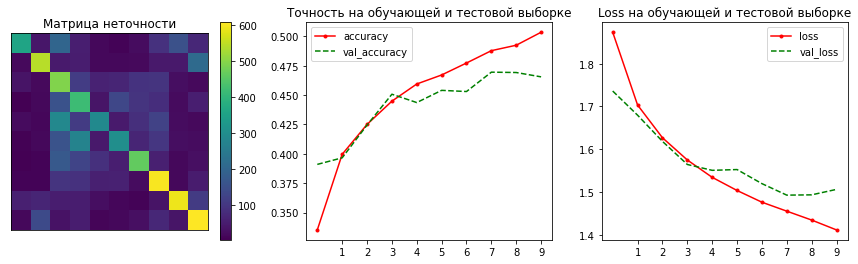

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Получили довольную низкую точность относительно предыдущих моделей. Это связано с тем, что датасет CIFAR-10 сложнее для распознавания линейными слоями.

Epoch 1/10
391/391 - 39s - loss: 2.0243 - accuracy: 0.3154 - val_loss: 1.8111 - val_accuracy: 0.3457 - 39s/epoch - 98ms/step
Epoch 2/10
391/391 - 39s - loss: 1.7245 - accuracy: 0.3874 - val_loss: 1.6902 - val_accuracy: 0.3915 - 39s/epoch - 99ms/step
Epoch 3/10
391/391 - 37s - loss: 1.6364 - accuracy: 0.4208 - val_loss: 1.5929 - val_accuracy: 0.4390 - 37s/epoch - 95ms/step
Epoch 4/10
391/391 - 38s - loss: 1.5830 - accuracy: 0.4403 - val_loss: 1.6036 - val_accuracy: 0.4344 - 38s/epoch - 97ms/step
Epoch 5/10
391/391 - 34s - loss: 1.5480 - accuracy: 0.4504 - val_loss: 1.5573 - val_accuracy: 0.4516 - 34s/epoch - 88ms/step
Epoch 6/10
391/391 - 34s - loss: 1.5126 - accuracy: 0.4660 - val_loss: 1.5084 - val_accuracy: 0.4687 - 34s/epoch - 88ms/step
Epoch 7/10
391/391 - 33s - loss: 1.4908 - accuracy: 0.4727 - val_loss: 1.5042 - val_accuracy: 0.4725 - 33s/epoch - 85ms/step
Epoch 8/10
391/391 - 38s - loss: 1.4698 - accuracy: 0.4805 - val_loss: 1.4962 - val_accuracy: 0.4652 - 38s/epoch - 98ms/step


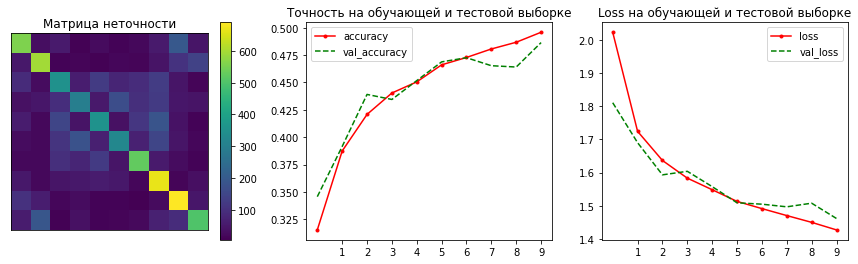

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

Удалось немного повысить точность модели путем увеличения числа нейронов.

#### 3-слойная модель с оптимизатором Adam

Epoch 1/10
391/391 - 46s - loss: 1.9389 - accuracy: 0.3138 - val_loss: 1.7890 - val_accuracy: 0.3549 - 46s/epoch - 119ms/step
Epoch 2/10
391/391 - 46s - loss: 1.6775 - accuracy: 0.4016 - val_loss: 1.6132 - val_accuracy: 0.4238 - 46s/epoch - 118ms/step
Epoch 3/10
391/391 - 41s - loss: 1.5880 - accuracy: 0.4332 - val_loss: 1.5938 - val_accuracy: 0.4348 - 41s/epoch - 106ms/step
Epoch 4/10
391/391 - 41s - loss: 1.5330 - accuracy: 0.4530 - val_loss: 1.5034 - val_accuracy: 0.4644 - 41s/epoch - 106ms/step
Epoch 5/10
391/391 - 41s - loss: 1.4778 - accuracy: 0.4734 - val_loss: 1.4875 - val_accuracy: 0.4779 - 41s/epoch - 106ms/step
Epoch 6/10
391/391 - 43s - loss: 1.4454 - accuracy: 0.4860 - val_loss: 1.4657 - val_accuracy: 0.4821 - 43s/epoch - 109ms/step
Epoch 7/10
391/391 - 41s - loss: 1.4137 - accuracy: 0.4965 - val_loss: 1.4463 - val_accuracy: 0.4873 - 41s/epoch - 105ms/step
Epoch 8/10
391/391 - 42s - loss: 1.3792 - accuracy: 0.5102 - val_loss: 1.4119 - val_accuracy: 0.4998 - 42s/epoch - 108

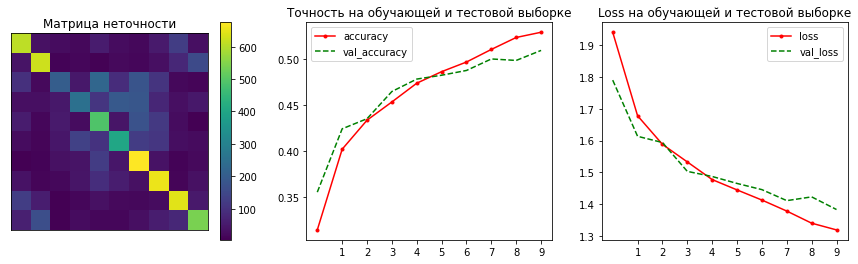

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)

#### 4-слойная модель с оптимизатором Adam

Epoch 1/10
391/391 - 43s - loss: 1.9005 - accuracy: 0.3121 - val_loss: 1.7459 - val_accuracy: 0.3672 - 43s/epoch - 110ms/step
Epoch 2/10
391/391 - 42s - loss: 1.6737 - accuracy: 0.3987 - val_loss: 1.6173 - val_accuracy: 0.4241 - 42s/epoch - 107ms/step
Epoch 3/10
391/391 - 50s - loss: 1.5809 - accuracy: 0.4335 - val_loss: 1.5400 - val_accuracy: 0.4479 - 50s/epoch - 127ms/step
Epoch 4/10
391/391 - 49s - loss: 1.5173 - accuracy: 0.4563 - val_loss: 1.4936 - val_accuracy: 0.4628 - 49s/epoch - 126ms/step
Epoch 5/10
391/391 - 47s - loss: 1.4744 - accuracy: 0.4723 - val_loss: 1.4921 - val_accuracy: 0.4687 - 47s/epoch - 121ms/step
Epoch 6/10
391/391 - 47s - loss: 1.4379 - accuracy: 0.4833 - val_loss: 1.4493 - val_accuracy: 0.4854 - 47s/epoch - 120ms/step
Epoch 7/10
391/391 - 44s - loss: 1.4045 - accuracy: 0.4974 - val_loss: 1.4580 - val_accuracy: 0.4732 - 44s/epoch - 112ms/step
Epoch 8/10
391/391 - 42s - loss: 1.3722 - accuracy: 0.5080 - val_loss: 1.4544 - val_accuracy: 0.4807 - 42s/epoch - 107

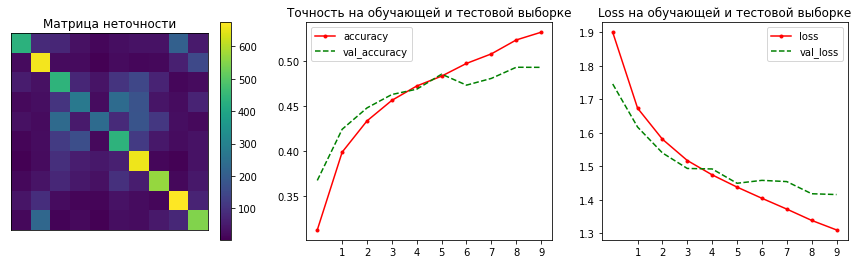

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile('adam', tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ['accuracy'])
h = model.fit(cifar_train.batch(128), epochs = 10, validation_data = cifar_test.batch(128), verbose = 2)
plot(model, h, cifar_test)